<a href="https://colab.research.google.com/github/soymarwin/ee298z/blob/main/ViT_Ear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ViT and DeiT on Unconstrained Ear Recognition**
A **mini-project** in **EE298Z - Deep Learning, Semester 01 - 2020-2021**
<br>Coded and Performed by **Marwin B. Alejo | 2020-20221 | University of the Philippines Diliman**
<br>
<br> ***Disclaimer:***
<br> *This mini-project was planned originally to be executed on Detection-Transformer (DeTr). However due to the incompatibility of the ear recognition task with DeTr architecture and its complexity, this project was executed in Vision-Transformer and Data-efficient image Transformer instead.*

## **Brief Introduction and Motivation**

* Ear recognition is a subset of object detection with ear images containing a unique human identity signature as the subject for detection. 
* Unconstrained ear recognition as a subset of ear recognition aims to recognize human identities through ear images taken from the wild. It had become a budding and open sector of biometric research in recent years, imploring computer vision methods.
* Past studies utilize image processing algorithms for the fabrication of an unconstrained ear recognition system. However, it is tedious and requires a large number of computing resources. [1, 2, 3]
* Recent studies suggested using different hand-crafted CNN architectures and algorithms to fabricate an unconstrained ear recognition system. However, the limited and small number of unconstrained ear datasets hinders the efficient implementation of these CNN algorithms as it requires a large number of ear images. [1, 2, 3]
* As a resort to the limitations of the recent studies, the concept of transfer learning is introduced to unconstrained ear recognition to extend CNN with only a limited number of unconstrained ear images without relying on hand-crafted and complex algorithms for practical and efficient system development. [1, 2, 3, 4]
* Given the above limitations and outcomes of former unconstrained ear recognition studies and the field itself, this mini-project generally aims to extend a pure Transformer Network to the task of unconstrained ear recognition. Transformer in deep learning is a nascent technology used initially in NLP but recently attracts researchers to explore and extend it in Computer Vision applications.




## **Objectives**
This mini-project aims to extend vanilla Transformer Network to Unconstrained Ear Recognition as a computer vision task and a subset of object detection with the following specific goals:
1.	Measure the transformer-based unconstrained ear recognition network's performance in terms of validation loss and accuracy; and
2.	Compare the validation accuracy as performance metric of the Transformer-based network with CNN-based through transfer learning network for unconstrained ear recognition.


## **Limitations of the Mini-Project**
As a mini-project, this study is limited only to the exploration of Transformer Network, specifically Vision-Transformer (ViT) without the inclusion of hybrid networks and Data-efficient image Transformer (DeiT), with unconstrained ear recognition by extension and compare its performance with the performance of the published results of the same task but uses a CNN-based approach. Furthermore, considering constraints such as time and computing resources (Google Colab Free) and since this mini-project does not aim to develop an unconstrained ear recognition prototype or an end-to-end system, all transformer networks are trained in up to 20-30 epochs only while CNN-based networks are trained beyond 100 epochs.

## **Review of Related Lits**
  Transformers first appeared as a simple and scalable solution to attain state-of-the-art results in NLP and is currently being extended in Computer Vision. Like transfer learning in CNN, Transformer Networks may be trained over large datasets and fine-tuned to learn on small datasets. Among the most recently developed transformer architectures for computer vision are Detection-Transformer (DeTr) [5], Vision-Transformer (ViT) [6] and Data-efficient image Transformer (DeiT) [7]. Although DeTr shows a comparable result over CNN-based detection models, its architecture does not suit directly with the recognition task of computer vision through which ViT and DeiT are evenly suited.<br>

  There have been no published studies relevant to any transformer-based recognition task at the moment of this writing except for Vision-Transformer (ViT) and Data-efficient image Transformer (DeiT). These Transformer networks achieved a state-of-the-art accuracy after being trained on ImageNet dataset. Most literature works in this area of computer vision and deep learning are subjected to the development of complex hand-crafted Transformer Networks for detection tasks and the architecture alone. Hence, in this mini-project, unconstrained ear recognition is extended to transformer-based networks, specifically the Vision-Transformer (ViT) and Data-efficient image Transformer (DeiT).



### **The Vision-Transformer (ViT)**
Vision-Transformer (ViT) employs a modified transformer network architecture as such it may directly operate on images instead of text. ViT divides an image into grid square patches. Each patch is flattened into a single vector by joining all  the channels of pixels in a patch and linearly inject it into the desired dimension. For it to learn, a learnable position embedding is added to each patch and allows the Transformer Network to learn the image's positional patch. Figure 1 shows the ViT architecture as shown in its original paper.

<br>

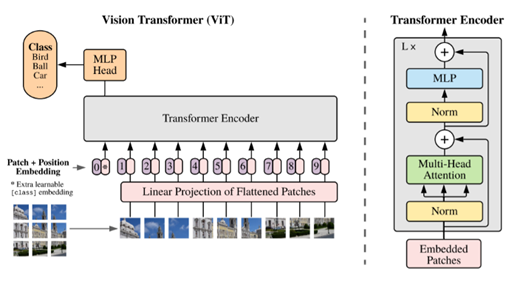

### **Data-efficient image Transformers (DeiT)**

DeiT is one of the Transformers networks developed for the recognition task of computer vision without relying to convolutional layer. The training strategy of DeiT is similar to those of convolutional training and learning features from datasets. The unique part which made this architecture comparable to those of CNN architecture is the addition of distillation which aids the learning process of the machine towards recognition modeling. Shown in figure 2 is the architecture of DeiT.

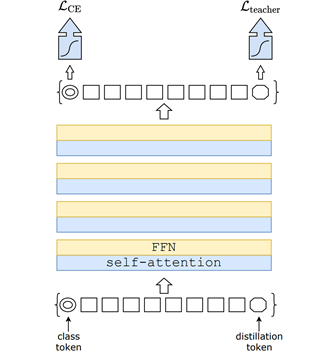


## **Methodological Approach**
Figure 3 shows the method used in this mini-project in chronological order.

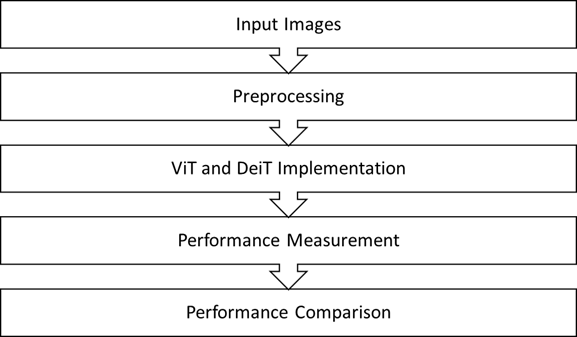

### **Input Images**

EarVN1.0 [8] is the used dataset in this mini-project. This dataset consists of unprocessed unconstrained ear images of 164 people, with each having ~180 images, for a total of 28,412 ear images. However, in consideration of the computing resources constraint for the unconstrained ear recognition task, only the first 20 classes of the EarVN dataset is used for a total of ~4000 images. Figure 03 shows a sample of the used ear images in this mini-project.

Images from each classes is split into training set with 80% of the total images and testing/validation set with 20% of the total images.

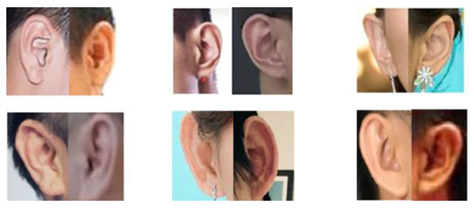


### **Preprocessing**

Preprocessing used in this mini-project includes image resizing to 224 square pixels, horizontal and vertical flipping of an image to 30 degrees, and the standard ImageNet normalization values. These preprocessing steps are applied to the training set while only the resizing and image normalization for testing/validation images. The preprocessed images are both applied on ViT and DeiT.

### **ViT and DeiT Implementation**

Following the ViT and DeiT description, Both ViT and DeiT for unconstrained ear recognition are implemented with the pre-trained ImageNet-21k model and fine-tuned to classify or recognize 20 people. Vision-Transformer is implemented in this mini-project using Pytorch with XLA on Google Colab TPU while DeiT is implemented with PyTorch on Google Colab GPU. The ViT model is trained on 20 epochs with the following configuration as shown in table 1 while DeiT is trained on 20-40 epochs provided that its setup is machine-efficient (see the codes below). Overfitting occurs on models trained beyond 20 epochs on ViT architecture.

* Batch size	    = 8 (ViT) and 32 (DeiT)
* Learning Rate	  = 0.00002 on Adam (Vit) and 0.001 on Adam (DeiT)
* Gamma	          = 0.7 (ViT)
* Epochs	        = 20 (ViT) and 20-50 (DeiT)

*Refer to the code implementation below for the complete visuals of this section.*


## **Perfromance and Results**

**Vision-Transformer on Unconstrained Ear Recognition achieves a validation accuracy of 95.31% with a loss of 26.36%. DeiT on the other hand achieves an accuracy of 88.33% with 1.4% loss on 20 epochs, 93.33% with 1.02% loss on 30 epochs, 96.11% with 0.88% on 40 epochs, and 96.11% with 0.69% loss @ 50 epochs**. These outcomes are closely comparable to the CNN-based transfer learning results on the same task [4]. Table 2 shows the comparative results of ViT and DeiT on Unconstrained Ear Recognition and the accuracy results of state-of-the-art CNN architectures on the same task with transfer learning (from my previous study). Although it is not included in the objectives, DeiT is more efficient (faster and accurate) than ViT for unconstrained ear recognition and that overfitting does not occur instantly with DeiT.

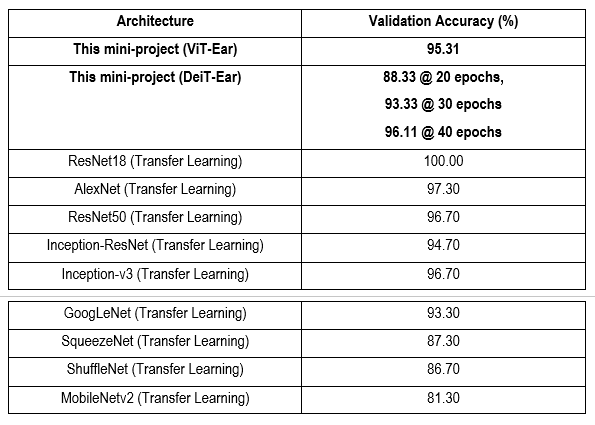



## **Conclusion**

In this mini-project, Transformer Network is extended to unconstrained ear recognition with Vision-Transformer and Data-efficient image Transformer (DeiT). Both of these transformers achieve an accuracy result that are closely comparable to the state-of-the-art CNN-models' accuracy results on the same task and may serve as an alternative and practical approach to the development of an end-to-end ear recognition system and other classification tasks of computer vision.

## **Recommendations**
Since this is a mini-study and shortly time-bounded, it is recommended to extend this into an end-to-end system incorporating Detection-Transformer (DeTr) and Vision-Transformer (ViT) as one. Also, it is recommended to use another fabricated unconstrained ear dataset similar to the make of Annotated Web Ears (AWE) of UERC and other available large datasets.<br><br>
It is also recommended to include inferential codes on both transformer networks.


## **References**

[1] 	Ž. Emeršič, V. Štruc and P. Peer, "Ear Recognition: More Than a Survey," CoRR, vol. abs/1611.06203, 2016. <br>
[2] 	Ž. Emeršič, D. Štepec, V. Štruc and P. Peer, "Training Convolutional Neural Networks with Limited Training Data for Ear Recognition in the Wild," in IEEE International Conference on Automatic Face & Gesture Recognition (FG 2017), Washington, DC, 2017. <br>
[3] 	E. Z. e. Al., "The Unconstrained Ear Recognition Challenge 2019," CoRR, 2019. <br>
[4] 	M. Alejo and C. P. Hate, "Unconstrained Ear Recognition through Domain Adaptive Deep Learning Models of Convolutional Neural Network," International Journal or Recent Technology and Engineering, vol. 8, no. 2, pp. 3143-3150, 2019. <br>
[5] 	N. Carion, F. Massa, G. Synnaeve, N. Usunier, A. Kirillov and S. Zagoruyko, "End-to-End Object Detection with Transformers," Lecture Notes in Computer Science, p. 213–229, May 2020. <br>
[6] 	A. Dosovitskiy, L. Beyer, A. Kolesnikov, D. Weissenborn, X. Zhai, T. Unterthiner, M. Dehghani, M. Minderer, G. Heigold, S. Gelly, J. Uszkoreit and N. Houlsby, "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale," CoRR, October 2020. <br>
[7] 	M. C. Hugo Touvron, M. Douze, F. Massa, A. Sablayrolles and H. Jégou, "Training data-efficient image transformers & distillation through attention," CoRR, December 2020. <br>
[8] 	V. T. Hoang, "EarVN1.0: A new large-scale ear images dataset in the wild," Data in Brief, vol. 27, 2019. 



# **ViT Code Implementation**

In [ ]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.7-cp36-cp36m-linux_x86_64.whl
!pip install timm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import torch_xla
import torch_xla.core.xla_model as xm
import torch_xla.distributed.xla_multiprocessing as xmp
import torch_xla.distributed.parallel_loader as pl
import timm
import gc
import os
import sys
import time
import random
from datetime import datetime
from PIL import Image
from tqdm.notebook import tqdm
from sklearn import model_selection, metrics
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.environ["XLA_USE_BF16"] = "1"
os.environ["XLA_TENSOR_ALLOCATOR_MAXSIZE"] = "100000000"

def seed_everything(seed):
  random.seed(seed)
  os.environ["PYTHONHASHSEED"] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
seed_everything(1001)

TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/train/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/val/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/Vit/jx_vit_base_p16_224-80ecf9dd.pth"

IMG_SIZE = 224
BATCH_SIZE = 8
LR = 2e-05
GAMMA = 0.7
N_EPOCHS = 20
N_CLASSES = 20
PRETRAINED_SETTING = True

transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

transforms_valid = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

# print("Available Vision Transformer Models: ") # Uncomment to display available pretrained models
# timm.list_models("vit*") # Uncomment to display available pretrained models

class ViTBase16(nn.Module):
  def __init__(self, n_classes, pretrained=False):
    super(ViTBase16, self).__init__()
    self.model = timm.create_model("vit_base_patch16_224", pretrained = False)
    if pretrained:
      self.model.load_state_dict(torch.load(MODEL_PATH))
    self.model.head = nn.Linear(self.model.head.in_features, n_classes)
  
  def forward(self, x):
    x = self.model(x)
    return x

  def train_one_epoch(self, train_loader, criterion, optimizer, device):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    self.model.train()
    for i, (data, target) in enumerate(train_loader):
      if device.type == "cuda":
        data, target = data.cuda(), target.cuda()
      elif device.type == "xla":
        data = data.to(device, dtype = torch.float32)
        target = target.to(device, dtype = torch.int64)
      optimizer.zero_grad()
      output = self.forward(data)
      loss = criterion(output, target)
      loss.backward()
      accuracy = (output.argmax(dim = 1) == target).float().mean()
      epoch_loss += loss
      epoch_accuracy += epoch_accuracy
      if device.type == "xla":
        xm.optimizer_step(optimizer)
        if i % 20 == 0:
          xm.master_print(f"\tBATCH {i+1}/{len(train_loader)} - LOSS: {loss}")
      else:
        optimizer.step()
    return epoch_loss / len(train_loader), epoch_accuracy / len(train_loader)

  def validate_one_epoch(self, valid_loader, criterion, device):
    valid_loss = 0.0
    valid_accuracy = 0.0
    self.model.eval()
    for data, target in valid_loader:
      if device.type == "cuda":
        data, target = data.cuda(), target.cuda()
      elif device.type == "xla":
        data = data.to(device, dtype = torch.float32)
        target = target.to(device, dtype = torch.int64)
      with torch.no_grad():
        output = self.model(data)
        loss = criterion(output, target)
        accuracy = (output.argmax(dim = 1) == target).float().mean()
        valid_loss += loss
        valid_accuracy += accuracy
    return valid_loss / len(valid_loader), valid_accuracy / len(valid_loader)

def fit_tpu(
    model, epochs, device, criterion, optimizer, train_loader, valid_loader=None
):

    valid_loss_min = np.Inf  # track change in validation loss

    # keeping track of losses as it happen
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    for epoch in range(1, epochs + 1):
        gc.collect()
        para_train_loader = pl.ParallelLoader(train_loader, [device])

        xm.master_print(f"{'='*50}")
        xm.master_print(f"EPOCH {epoch} - TRAINING...")
        train_loss, train_acc = model.train_one_epoch(
            para_train_loader.per_device_loader(device), criterion, optimizer, device
        )
        xm.master_print(
            f"\n\t[TRAIN] EPOCH {epoch} - LOSS: {train_loss}, ACCURACY: {train_acc}\n"
        )
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        gc.collect()

        if valid_loader is not None:
            gc.collect()
            para_valid_loader = pl.ParallelLoader(valid_loader, [device])
            xm.master_print(f"EPOCH {epoch} - VALIDATING...")
            valid_loss, valid_acc = model.validate_one_epoch(
                para_valid_loader.per_device_loader(device), criterion, device
            )
            xm.master_print(f"\t[VALID] LOSS: {valid_loss}, ACCURACY: {valid_acc}\n")
            valid_losses.append(valid_loss)
            valid_accs.append(valid_acc)
            gc.collect()

            # save model if validation loss has decreased
            if valid_loss <= valid_loss_min and epoch != 1:
                xm.master_print(
                    "Validation loss decreased ({:.4f} --> {:.4f}).  Saving model ...".format(
                        valid_loss_min, valid_loss
                    )
                )
                # xm.save(model.state_dict(), 'best_model.pth')

            valid_loss_min = valid_loss

    return {
        "train_loss": train_losses,
        "valid_losses": valid_losses,
        "train_acc": train_accs,
        "valid_acc": valid_accs,
    }

model = ViTBase16(n_classes = N_CLASSES, pretrained = PRETRAINED_SETTING)

def _run():
  train_dataset = torchvision.datasets.ImageFolder(TRAIN_PATH, transform = transforms_train)
  valid_dataset = torchvision.datasets.ImageFolder(TEST_PATH, transform = transforms_valid)

  train_sampler = torch.utils.data.distributed.DistributedSampler(
      train_dataset,
      num_replicas = xm.xrt_world_size(),
      rank = xm.get_ordinal(),
      shuffle = True,
  )

  valid_sampler = torch.utils.data.distributed.DistributedSampler(
      valid_dataset,
      num_replicas = xm.xrt_world_size(),
      rank = xm.get_ordinal(),
      shuffle = False,
  )

  train_loader = torch.utils.data.DataLoader(
      dataset = train_dataset,
      batch_size = BATCH_SIZE,
      sampler = train_sampler,
      drop_last = True,
      num_workers = 8,
  )

  valid_loader = torch.utils.data.DataLoader(
      dataset = valid_dataset,
      batch_size = BATCH_SIZE,
      sampler = valid_sampler,
      drop_last = True,
      num_workers = 8,
  )

  criterion = nn.CrossEntropyLoss()
  device = xm.xla_device()
  model.to(device)

  lr = LR * xm.xrt_world_size()
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)
  xm.master_print(f"INITIALIZING TRAINING ON {xm.xrt_world_size()} TPU CORES")
  start_time = datetime.now()
  xm.master_print(f"Start Time: {start_time}")

  logs = fit_tpu(
      model = model,
      epochs = N_EPOCHS,
      device = device,
      criterion = criterion,
      optimizer = optimizer,
      train_loader = train_loader,
      valid_loader = valid_loader,
  )

  xm.master_print(f"Execution time: {datetime.now() - start_time}")
  xm.master_print("Saving model")
  xm.save(model.state_dict(),f'/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/ViT/checkpoint_{datetime.now().strftime("%Y%m%d-%H%M")}.pth')

def _mp_fn(rank, flags):
  torch.set_default_tensor_type("torch.FloatTensor")
  a = _run()

Mounted at /content/drive/


**First 20 Classes; 25 Iterations**

In [ ]:
FLAGS = {}
xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=8, start_method="fork")

INITIALIZING TRAINING ON 8 TPU CORES
Start Time: 2021-01-01 13:34:47.417685
EPOCH 1 - TRAINING...
	BATCH 1/51 - LOSS: 3.265625
	BATCH 21/51 - LOSS: 2.90625
	BATCH 41/51 - LOSS: 2.40625

	[TRAIN] EPOCH 1 - LOSS: 2.640625, ACCURACY: 0.0

EPOCH 1 - VALIDATING...
	[VALID] LOSS: 2.3125, ACCURACY: 0.326171875

EPOCH 2 - TRAINING...
	BATCH 1/51 - LOSS: 2.0625
	BATCH 21/51 - LOSS: 2.25
	BATCH 41/51 - LOSS: 1.390625

	[TRAIN] EPOCH 2 - LOSS: 1.9921875, ACCURACY: 0.0

EPOCH 2 - VALIDATING...
	[VALID] LOSS: 1.5859375, ACCURACY: 0.55859375

Validation loss decreased (2.3125 --> 1.5859).  Saving model ...
EPOCH 3 - TRAINING...
	BATCH 1/51 - LOSS: 1.203125
	BATCH 21/51 - LOSS: 1.015625
	BATCH 41/51 - LOSS: 0.58984375

	[TRAIN] EPOCH 3 - LOSS: 1.421875, ACCURACY: 0.0

EPOCH 3 - VALIDATING...
	[VALID] LOSS: 1.0546875, ACCURACY: 0.69140625

Validation loss decreased (1.5859 --> 1.0547).  Saving model ...
EPOCH 4 - TRAINING...
	BATCH 1/51 - LOSS: 1.0859375
	BATCH 21/51 - LOSS: 0.875
	BATCH 41/51 - LOSS:

In [ ]:
FLAGS = {}
xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=8, start_method="fork")

INITIALIZING TRAINING ON 8 TPU CORES
Start Time: 2021-01-01 14:04:50.033745
EPOCH 1 - TRAINING...
	BATCH 1/51 - LOSS: 3.265625
	BATCH 21/51 - LOSS: 2.90625
	BATCH 41/51 - LOSS: 2.40625

	[TRAIN] EPOCH 1 - LOSS: 2.640625, ACCURACY: 0.0

EPOCH 1 - VALIDATING...
	[VALID] LOSS: 231.0, ACCURACY: 32.5

EPOCH 2 - TRAINING...
	BATCH 1/51 - LOSS: 2.0625
	BATCH 21/51 - LOSS: 2.25
	BATCH 41/51 - LOSS: 1.390625

	[TRAIN] EPOCH 2 - LOSS: 1.9921875, ACCURACY: 0.0

EPOCH 2 - VALIDATING...
	[VALID] LOSS: 159.0, ACCURACY: 55.75

Validation loss decreased (2.3125 --> 1.5859).  Saving model ...
EPOCH 3 - TRAINING...
	BATCH 1/51 - LOSS: 1.203125
	BATCH 21/51 - LOSS: 1.015625
	BATCH 41/51 - LOSS: 0.58984375

	[TRAIN] EPOCH 3 - LOSS: 1.421875, ACCURACY: 0.0

EPOCH 3 - VALIDATING...
	[VALID] LOSS: 105.5, ACCURACY: 69.0

Validation loss decreased (1.5859 --> 1.0547).  Saving model ...
EPOCH 4 - TRAINING...
	BATCH 1/51 - LOSS: 1.0859375
	BATCH 21/51 - LOSS: 0.875
	BATCH 41/51 - LOSS: 0.6953125

	[TRAIN] EPOCH 

In [ ]:
FLAGS = {}
xmp.spawn(_mp_fn, args=(FLAGS,), nprocs=8, start_method="fork")

INITIALIZING TRAINING ON 8 TPU CORES
Start Time: 2021-01-01 14:36:48.369160
EPOCH 1 - TRAINING...
	BATCH 1/51 - LOSS: 3.265625
	BATCH 21/51 - LOSS: 2.90625
	BATCH 41/51 - LOSS: 2.40625

	[TRAIN] EPOCH 1 - LOSS: 2.640625, ACCURACY: 0.0

EPOCH 1 - VALIDATING...
	[VALID] LOSS: 2.3125, ACCURACY: 0.326171875

EPOCH 2 - TRAINING...
	BATCH 1/51 - LOSS: 2.0625
	BATCH 21/51 - LOSS: 2.25
	BATCH 41/51 - LOSS: 1.390625

	[TRAIN] EPOCH 2 - LOSS: 1.9921875, ACCURACY: 0.0

EPOCH 2 - VALIDATING...
	[VALID] LOSS: 1.5859375, ACCURACY: 0.55859375

Validation loss decreased (2.3125 --> 1.5859).  Saving model ...
EPOCH 3 - TRAINING...
	BATCH 1/51 - LOSS: 1.203125
	BATCH 21/51 - LOSS: 1.015625
	BATCH 41/51 - LOSS: 0.58984375

	[TRAIN] EPOCH 3 - LOSS: 1.421875, ACCURACY: 0.0

EPOCH 3 - VALIDATING...
	[VALID] LOSS: 1.0546875, ACCURACY: 0.69140625

Validation loss decreased (1.5859 --> 1.0547).  Saving model ...
EPOCH 4 - TRAINING...
	BATCH 1/51 - LOSS: 1.0859375
	BATCH 21/51 - LOSS: 0.875
	BATCH 41/51 - LOSS:

# **DeiT Code Implementation**

In [ ]:
!pip install timm
!CUDA_LAUNCH_BLOCKING=1
import os
import cv2
import json
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import torch
from torch import nn
import albumentations as A
from timm.utils import accuracy
from timm.data import Mixup
from timm.models import create_model
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.scheduler import create_scheduler
import torchvision.transforms as transforms
from timm.optim import create_optimizer
from timm.utils import NativeScaler, get_state_dict, ModelEma
from timm.models.registry import register_model
from timm.models.vision_transformer import VisionTransformer, _cfg
from timm.models import create_model
import torchvision
import numpy as np
import collections
import math
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/train/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/val/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/deit.pth"

image_size = 224
IMG_SIZE = 224
BATCH_SIZE = 32
LR = 2e-05
GAMMA = 0.7
N_EPOCHS = 20
N_CLASSES = 20

def get_loaders(batch_size = 180, num_workers=4):
  transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

  transforms_valid = torchvision.transforms.Compose(
      [
          transforms.Resize((IMG_SIZE, IMG_SIZE)),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
      ]
  )

  train_dataset = torchvision.datasets.ImageFolder(TRAIN_PATH, transform = transforms_train)
  valid_dataset = torchvision.datasets.ImageFolder(TEST_PATH, transform = transforms_valid)

  train_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      drop_last=True,
    )

  valid_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      drop_last=True,
    )

  loaders = collections.OrderedDict()
  loaders["train"] = train_loader
  loaders["valid"] = valid_loader

  return loaders


@register_model
def deit_small_patch16_224(pretrained=False, **kwargs):
    model = VisionTransformer(img_size=224,
        patch_size=16, embed_dim=384, depth=12, num_heads=6, mlp_ratio=4, qkv_bias=True,
        norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    d_c = _cfg()
    d_c['input_size'] = (3,224,224)
    model.default_cfg = d_c
    if pretrained:
        checkpoint = torch.hub.load_state_dict_from_url(
            url="https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth",
            map_location="cpu", check_hash=True
        )
        checkpoint["model"].pop('head.weight')
        checkpoint["model"].pop('head.bias')
        
        model.load_state_dict(checkpoint["model"], strict=False)
    return model

model = create_model(
    'deit_small_patch16_224',
    pretrained=True,
    num_classes=20)

model_ema = ModelEma(
            model,
            decay=0.99,
            device='cuda')

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)

linear_scaled_lr = 0.0001 * BATCH_SIZE * 1 / 512.0
lr = linear_scaled_lr
optimizer  = torch.optim.Adam(model.parameters(), lr=lr)
loss_scaler = NativeScaler()

lr_scheduler =torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 0.001)

criterion = nn.CrossEntropyLoss()

mixup_fn = Mixup(
            mixup_alpha=0.2, cutmix_alpha=0.03, 
            prob=0.8, switch_prob=0.3, mode= 'batch', num_classes=20)

@torch.no_grad()
def evaluate(data_loader, model, device):
    criterion = torch.nn.CrossEntropyLoss()


    # switch to evaluation mode
    model.eval()
    acc1_mean = 0.0
    acc5_mean = 0.0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    
    for images, target in data_loader:
        images = images.to(device, non_blocking=True)
        target = target.to(device, non_blocking=True)

        # compute output
        with torch.cuda.amp.autocast():
            output = model(images)
            loss = criterion(output, target)

        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        acc1_mean+=acc1.item()
        acc5_mean+=acc5.item()
        

        batch_size = images.shape[0]
    print('* Acc@1 {:.3f} Acc@5 {:.3f} loss {:.3f}'
          .format(acc1_mean/Batch, acc5_mean/Batch, loss.item()))
    
def train_one_epoch(model, criterion, data_loader, optimizer,
                    device, epoch, loss_scaler, max_norm,
                    model_ema, mixup_fn):

    model.train()
    model.to(device)
    header = 'Epoch: [{}]'.format(epoch)
    print_freq = 50
    count = 0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    loss_mean = 0.0
    for samples, targets in data_loader:
        count +=1
        samples = samples.to(device, non_blocking=True)
        targets = targets.to(device, non_blocking=True)

#         if mixup_fn is not None:
#             samples, _ = mixup_fn(samples, targets)

            

        with torch.cuda.amp.autocast():
            outputs = model(samples)
            
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        loss_mean += loss_value 

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            sys.exit(1)

        optimizer.zero_grad()

        # this attribute is added by timm on one optimizer (adahessian)
        is_second_order = hasattr(optimizer, 'is_second_order') and optimizer.is_second_order
        loss_scaler(loss, optimizer, clip_grad=max_norm,
                    parameters=model.parameters(), create_graph=is_second_order)

        torch.cuda.synchronize()
        if model_ema is not None:
            model_ema.update(model)

        if count % print_freq == 0:
            current_time = datetime.now().strftime("%H:%M:%S")
            print(f'{current_time}\tEPOCH: [{epoch}/10] STEP: [{count}/{Batch}], LOSS: {loss_mean/50}')
            loss_mean = 0.0
    torch.save({'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'lr_scheduler': lr_scheduler.state_dict(),
                'epoch': epoch,
                'model_ema': get_state_dict(model_ema),
                }, MODEL_PATH)

loaders = get_loaders()

print("Start training")
max_accuracy = 0.0
for epoch in range(0, 19):

    train_stats = train_one_epoch(
        model, criterion, loaders["train"],
        optimizer, 'cuda', epoch, loss_scaler,
        None, model_ema, mixup_fn
    )

    lr_scheduler.step(epoch)
    evaluate( loaders["valid"], model, 'cuda')

Mounted at /content/drive/
number of params: 21673364
Start training
Total Batch: 18
Total Batch: 4


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


* Acc@1 10.556 Acc@5 37.639 loss 2.866
Total Batch: 18
Total Batch: 4
* Acc@1 16.528 Acc@5 45.694 loss 2.882
Total Batch: 18
Total Batch: 4
* Acc@1 19.583 Acc@5 51.111 loss 2.849
Total Batch: 18
Total Batch: 4
* Acc@1 21.389 Acc@5 57.083 loss 2.754
Total Batch: 18
Total Batch: 4
* Acc@1 24.306 Acc@5 61.111 loss 2.635
Total Batch: 18
Total Batch: 4
* Acc@1 29.028 Acc@5 66.806 loss 2.505
Total Batch: 18
Total Batch: 4
* Acc@1 31.389 Acc@5 67.778 loss 2.416
Total Batch: 18
Total Batch: 4
* Acc@1 32.917 Acc@5 71.667 loss 2.305
Total Batch: 18
Total Batch: 4
* Acc@1 35.972 Acc@5 72.917 loss 2.191
Total Batch: 18
Total Batch: 4
* Acc@1 38.056 Acc@5 75.139 loss 2.121
Total Batch: 18
Total Batch: 4
* Acc@1 41.389 Acc@5 77.917 loss 1.988
Total Batch: 18
Total Batch: 4
* Acc@1 43.472 Acc@5 80.833 loss 1.886
Total Batch: 18
Total Batch: 4
* Acc@1 45.000 Acc@5 80.833 loss 1.811
Total Batch: 18
Total Batch: 4
* Acc@1 48.333 Acc@5 83.750 loss 1.774
Total Batch: 18
Total Batch: 4
* Acc@1 48.194 Acc@5

In [ ]:
!pip install timm
!CUDA_LAUNCH_BLOCKING=1
import os
import cv2
import json
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import torch
from torch import nn
import albumentations as A
from timm.utils import accuracy
from timm.data import Mixup
from timm.models import create_model
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.scheduler import create_scheduler
import torchvision.transforms as transforms
from timm.optim import create_optimizer
from timm.utils import NativeScaler, get_state_dict, ModelEma
from timm.models.registry import register_model
from timm.models.vision_transformer import VisionTransformer, _cfg
from timm.models import create_model
import torchvision
import numpy as np
import collections
import math
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/train/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/val/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/deit.pth"

image_size = 224
IMG_SIZE = 224
BATCH_SIZE = 32
LR = 2e-05
GAMMA = 0.7
N_EPOCHS = 20
N_CLASSES = 20

def get_loaders(batch_size = 180, num_workers=4):
  transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

  transforms_valid = torchvision.transforms.Compose(
      [
          transforms.Resize((IMG_SIZE, IMG_SIZE)),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
      ]
  )

  train_dataset = torchvision.datasets.ImageFolder(TRAIN_PATH, transform = transforms_train)
  valid_dataset = torchvision.datasets.ImageFolder(TEST_PATH, transform = transforms_valid)

  train_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      drop_last=True,
    )

  valid_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      drop_last=True,
    )

  loaders = collections.OrderedDict()
  loaders["train"] = train_loader
  loaders["valid"] = valid_loader

  return loaders


@register_model
def deit_small_patch16_224(pretrained=False, **kwargs):
    model = VisionTransformer(img_size=224,
        patch_size=16, embed_dim=384, depth=12, num_heads=6, mlp_ratio=4, qkv_bias=True,
        norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    d_c = _cfg()
    d_c['input_size'] = (3,224,224)
    model.default_cfg = d_c
    if pretrained:
        checkpoint = torch.hub.load_state_dict_from_url(
            url="https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth",
            map_location="cpu", check_hash=True
        )
        checkpoint["model"].pop('head.weight')
        checkpoint["model"].pop('head.bias')
        
        model.load_state_dict(checkpoint["model"], strict=False)
    return model

model = create_model(
    'deit_small_patch16_224',
    pretrained=True,
    num_classes=20)

model_ema = ModelEma(
            model,
            decay=0.99,
            device='cuda')

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)

linear_scaled_lr = 0.0001 * BATCH_SIZE * 1 / 512.0
lr = linear_scaled_lr
optimizer  = torch.optim.Adam(model.parameters(), lr=lr)
loss_scaler = NativeScaler()

lr_scheduler =torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 0.001)

criterion = nn.CrossEntropyLoss()

mixup_fn = Mixup(
            mixup_alpha=0.2, cutmix_alpha=0.03, 
            prob=0.8, switch_prob=0.3, mode= 'batch', num_classes=20)

@torch.no_grad()
def evaluate(data_loader, model, device):
    criterion = torch.nn.CrossEntropyLoss()


    # switch to evaluation mode
    model.eval()
    acc1_mean = 0.0
    acc5_mean = 0.0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    
    for images, target in data_loader:
        images = images.to(device, non_blocking=True)
        target = target.to(device, non_blocking=True)

        # compute output
        with torch.cuda.amp.autocast():
            output = model(images)
            loss = criterion(output, target)

        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        acc1_mean+=acc1.item()
        acc5_mean+=acc5.item()
        

        batch_size = images.shape[0]
    print('* Acc@1 {:.3f} Acc@5 {:.3f} loss {:.3f}'
          .format(acc1_mean/Batch, acc5_mean/Batch, loss.item()))
    
def train_one_epoch(model, criterion, data_loader, optimizer,
                    device, epoch, loss_scaler, max_norm,
                    model_ema, mixup_fn):

    model.train()
    model.to(device)
    header = 'Epoch: [{}]'.format(epoch)
    print_freq = 50
    count = 0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    loss_mean = 0.0
    for samples, targets in data_loader:
        count +=1
        samples = samples.to(device, non_blocking=True)
        targets = targets.to(device, non_blocking=True)

#         if mixup_fn is not None:
#             samples, _ = mixup_fn(samples, targets)

            

        with torch.cuda.amp.autocast():
            outputs = model(samples)
            
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        loss_mean += loss_value 

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            sys.exit(1)

        optimizer.zero_grad()

        # this attribute is added by timm on one optimizer (adahessian)
        is_second_order = hasattr(optimizer, 'is_second_order') and optimizer.is_second_order
        loss_scaler(loss, optimizer, clip_grad=max_norm,
                    parameters=model.parameters(), create_graph=is_second_order)

        torch.cuda.synchronize()
        if model_ema is not None:
            model_ema.update(model)

        if count % print_freq == 0:
            current_time = datetime.now().strftime("%H:%M:%S")
            print(f'{current_time}\tEPOCH: [{epoch}/10] STEP: [{count}/{Batch}], LOSS: {loss_mean/50}')
            loss_mean = 0.0
    torch.save({'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'lr_scheduler': lr_scheduler.state_dict(),
                'epoch': epoch,
                'model_ema': get_state_dict(model_ema),
                }, MODEL_PATH)

loaders = get_loaders()

print("Start training")
max_accuracy = 0.0
for epoch in range(0, 29):

    train_stats = train_one_epoch(
        model, criterion, loaders["train"],
        optimizer, 'cuda', epoch, loss_scaler,
        None, model_ema, mixup_fn
    )

    lr_scheduler.step(epoch)
    evaluate( loaders["valid"], model, 'cuda')


Mounted at /content/drive/
number of params: 21673364
Start training
Total Batch: 18
Total Batch: 4


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


* Acc@1 9.028 Acc@5 33.889 loss 2.969
Total Batch: 18
Total Batch: 4
* Acc@1 14.583 Acc@5 38.611 loss 2.952
Total Batch: 18
Total Batch: 4
* Acc@1 15.694 Acc@5 42.500 loss 2.907
Total Batch: 18
Total Batch: 4
* Acc@1 17.361 Acc@5 47.083 loss 2.869
Total Batch: 18
Total Batch: 4
* Acc@1 18.750 Acc@5 52.500 loss 2.778
Total Batch: 18
Total Batch: 4
* Acc@1 23.194 Acc@5 60.972 loss 2.624
Total Batch: 18
Total Batch: 4
* Acc@1 26.111 Acc@5 65.972 loss 2.503
Total Batch: 18
Total Batch: 4
* Acc@1 29.167 Acc@5 69.861 loss 2.361
Total Batch: 18
Total Batch: 4
* Acc@1 33.056 Acc@5 72.639 loss 2.284
Total Batch: 18
Total Batch: 4
* Acc@1 36.806 Acc@5 75.694 loss 2.163
Total Batch: 18
Total Batch: 4
* Acc@1 40.833 Acc@5 76.389 loss 2.079
Total Batch: 18
Total Batch: 4
* Acc@1 42.778 Acc@5 78.472 loss 2.002
Total Batch: 18
Total Batch: 4
* Acc@1 45.000 Acc@5 80.694 loss 1.913
Total Batch: 18
Total Batch: 4
* Acc@1 49.444 Acc@5 82.500 loss 1.779
Total Batch: 18
Total Batch: 4
* Acc@1 51.389 Acc@5 

In [ ]:
!pip install timm
!CUDA_LAUNCH_BLOCKING=1
import os
import cv2
import json
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import torch
from torch import nn
import albumentations as A
from timm.utils import accuracy
from timm.data import Mixup
from timm.models import create_model
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.scheduler import create_scheduler
import torchvision.transforms as transforms
from timm.optim import create_optimizer
from timm.utils import NativeScaler, get_state_dict, ModelEma
from timm.models.registry import register_model
from timm.models.vision_transformer import VisionTransformer, _cfg
from timm.models import create_model
import torchvision
import numpy as np
import collections
import math
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/train/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/val/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/deit.pth"

image_size = 224
IMG_SIZE = 224
BATCH_SIZE = 32

def get_loaders(batch_size = 180, num_workers=4):
  transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

  transforms_valid = torchvision.transforms.Compose(
      [
          transforms.Resize((IMG_SIZE, IMG_SIZE)),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
      ]
  )

  train_dataset = torchvision.datasets.ImageFolder(TRAIN_PATH, transform = transforms_train)
  valid_dataset = torchvision.datasets.ImageFolder(TEST_PATH, transform = transforms_valid)

  train_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      drop_last=True,
    )

  valid_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      drop_last=True,
    )

  loaders = collections.OrderedDict()
  loaders["train"] = train_loader
  loaders["valid"] = valid_loader

  return loaders


@register_model
def deit_small_patch16_224(pretrained=False, **kwargs):
    model = VisionTransformer(img_size=224,
        patch_size=16, embed_dim=384, depth=12, num_heads=6, mlp_ratio=4, qkv_bias=True,
        norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    d_c = _cfg()
    d_c['input_size'] = (3,224,224)
    model.default_cfg = d_c
    if pretrained:
        checkpoint = torch.hub.load_state_dict_from_url(
            url="https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth",
            map_location="cpu", check_hash=True
        )
        checkpoint["model"].pop('head.weight')
        checkpoint["model"].pop('head.bias')
        
        model.load_state_dict(checkpoint["model"], strict=False)
    return model

model = create_model(
    'deit_small_patch16_224',
    pretrained=True,
    num_classes=20)

model_ema = ModelEma(
            model,
            decay=0.99,
            device='cuda')

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)

linear_scaled_lr = 0.0001 * BATCH_SIZE * 1 / 512.0
lr = linear_scaled_lr
optimizer  = torch.optim.Adam(model.parameters(), lr=lr)
loss_scaler = NativeScaler()

lr_scheduler =torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 0.001)

criterion = nn.CrossEntropyLoss()

mixup_fn = Mixup(
            mixup_alpha=0.2, cutmix_alpha=0.03, 
            prob=0.8, switch_prob=0.3, mode= 'batch', num_classes=20)

@torch.no_grad()
def evaluate(data_loader, model, device):
    criterion = torch.nn.CrossEntropyLoss()


    # switch to evaluation mode
    model.eval()
    acc1_mean = 0.0
    acc5_mean = 0.0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    
    for images, target in data_loader:
        images = images.to(device, non_blocking=True)
        target = target.to(device, non_blocking=True)

        # compute output
        with torch.cuda.amp.autocast():
            output = model(images)
            loss = criterion(output, target)

        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        acc1_mean+=acc1.item()
        acc5_mean+=acc5.item()
        

        batch_size = images.shape[0]
    print('* Acc@1 {:.3f} Acc@5 {:.3f} loss {:.3f}'
          .format(acc1_mean/Batch, acc5_mean/Batch, loss.item()))
    
def train_one_epoch(model, criterion, data_loader, optimizer,
                    device, epoch, loss_scaler, max_norm,
                    model_ema, mixup_fn):

    model.train()
    model.to(device)
    header = 'Epoch: [{}]'.format(epoch)
    print_freq = 50
    count = 0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    loss_mean = 0.0
    for samples, targets in data_loader:
        count +=1
        samples = samples.to(device, non_blocking=True)
        targets = targets.to(device, non_blocking=True)

#         if mixup_fn is not None:
#             samples, _ = mixup_fn(samples, targets)

            

        with torch.cuda.amp.autocast():
            outputs = model(samples)
            
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        loss_mean += loss_value 

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            sys.exit(1)

        optimizer.zero_grad()

        # this attribute is added by timm on one optimizer (adahessian)
        is_second_order = hasattr(optimizer, 'is_second_order') and optimizer.is_second_order
        loss_scaler(loss, optimizer, clip_grad=max_norm,
                    parameters=model.parameters(), create_graph=is_second_order)

        torch.cuda.synchronize()
        if model_ema is not None:
            model_ema.update(model)

        if count % print_freq == 0:
            current_time = datetime.now().strftime("%H:%M:%S")
            print(f'{current_time}\tEPOCH: [{epoch}/10] STEP: [{count}/{Batch}], LOSS: {loss_mean/50}')
            loss_mean = 0.0
    torch.save({'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'lr_scheduler': lr_scheduler.state_dict(),
                'epoch': epoch,
                'model_ema': get_state_dict(model_ema),
                }, MODEL_PATH)

loaders = get_loaders()

print("Start training")
max_accuracy = 0.0
for epoch in range(0, 39):

    train_stats = train_one_epoch(
        model, criterion, loaders["train"],
        optimizer, 'cuda', epoch, loss_scaler,
        None, model_ema, mixup_fn
    )

    lr_scheduler.step(epoch)
    evaluate( loaders["valid"], model, 'cuda')


Mounted at /content/drive/
number of params: 21673364
Start training
Total Batch: 18
Total Batch: 4


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


* Acc@1 11.111 Acc@5 34.583 loss 2.934
Total Batch: 18
Total Batch: 4
* Acc@1 12.222 Acc@5 43.472 loss 2.887
Total Batch: 18
Total Batch: 4
* Acc@1 15.972 Acc@5 48.889 loss 2.804
Total Batch: 18
Total Batch: 4
* Acc@1 17.917 Acc@5 54.444 loss 2.719
Total Batch: 18
Total Batch: 4
* Acc@1 20.556 Acc@5 57.361 loss 2.601
Total Batch: 18
Total Batch: 4
* Acc@1 24.167 Acc@5 61.111 loss 2.472
Total Batch: 18
Total Batch: 4
* Acc@1 27.639 Acc@5 64.167 loss 2.348
Total Batch: 18
Total Batch: 4
* Acc@1 30.139 Acc@5 68.611 loss 2.256
Total Batch: 18
Total Batch: 4
* Acc@1 30.972 Acc@5 70.833 loss 2.142
Total Batch: 18
Total Batch: 4
* Acc@1 32.917 Acc@5 72.917 loss 2.059
Total Batch: 18
Total Batch: 4
* Acc@1 37.778 Acc@5 74.444 loss 1.906
Total Batch: 18
Total Batch: 4
* Acc@1 38.333 Acc@5 77.500 loss 1.871
Total Batch: 18
Total Batch: 4
* Acc@1 41.528 Acc@5 80.000 loss 1.819
Total Batch: 18
Total Batch: 4
* Acc@1 45.000 Acc@5 81.667 loss 1.712
Total Batch: 18
Total Batch: 4
* Acc@1 46.667 Acc@5

In [ ]:
!pip install timm
!CUDA_LAUNCH_BLOCKING=1
import os
import cv2
import json
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
import torch
from torch import nn
import albumentations as A
from timm.utils import accuracy
from timm.data import Mixup
from timm.models import create_model
from timm.loss import LabelSmoothingCrossEntropy, SoftTargetCrossEntropy
from timm.scheduler import create_scheduler
import torchvision.transforms as transforms
from timm.optim import create_optimizer
from timm.utils import NativeScaler, get_state_dict, ModelEma
from timm.models.registry import register_model
from timm.models.vision_transformer import VisionTransformer, _cfg
from timm.models import create_model
import torchvision
import numpy as np
import collections
import math
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


TRAIN_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/train/"
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/val/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/ViT-Ear/EarVN/model/deit.pth"

image_size = 224
IMG_SIZE = 224
BATCH_SIZE = 32

def get_loaders(batch_size = 180, num_workers=4):
  transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomResizedCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

  transforms_valid = torchvision.transforms.Compose(
      [
          transforms.Resize((IMG_SIZE, IMG_SIZE)),
          transforms.ToTensor(),
          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
      ]
  )

  train_dataset = torchvision.datasets.ImageFolder(TRAIN_PATH, transform = transforms_train)
  valid_dataset = torchvision.datasets.ImageFolder(TEST_PATH, transform = transforms_valid)

  train_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      drop_last=True,
    )

  valid_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      drop_last=True,
    )

  loaders = collections.OrderedDict()
  loaders["train"] = train_loader
  loaders["valid"] = valid_loader

  return loaders


@register_model
def deit_small_patch16_224(pretrained=False, **kwargs):
    model = VisionTransformer(img_size=224,
        patch_size=16, embed_dim=384, depth=12, num_heads=6, mlp_ratio=4, qkv_bias=True,
        norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    d_c = _cfg()
    d_c['input_size'] = (3,224,224)
    model.default_cfg = d_c
    if pretrained:
        checkpoint = torch.hub.load_state_dict_from_url(
            url="https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth",
            map_location="cpu", check_hash=True
        )
        checkpoint["model"].pop('head.weight')
        checkpoint["model"].pop('head.bias')
        
        model.load_state_dict(checkpoint["model"], strict=False)
    return model

model = create_model(
    'deit_small_patch16_224',
    pretrained=True,
    num_classes=20)

model_ema = ModelEma(
            model,
            decay=0.99,
            device='cuda')

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('number of params:', n_parameters)

linear_scaled_lr = 0.0001 * BATCH_SIZE * 1 / 512.0
lr = linear_scaled_lr
optimizer  = torch.optim.Adam(model.parameters(), lr=lr)
loss_scaler = NativeScaler()

lr_scheduler =torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 0.001)

criterion = nn.CrossEntropyLoss()

mixup_fn = Mixup(
            mixup_alpha=0.2, cutmix_alpha=0.03, 
            prob=0.8, switch_prob=0.3, mode= 'batch', num_classes=20)

@torch.no_grad()
def evaluate(data_loader, model, device):
    criterion = torch.nn.CrossEntropyLoss()


    # switch to evaluation mode
    model.eval()
    acc1_mean = 0.0
    acc5_mean = 0.0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    
    for images, target in data_loader:
        images = images.to(device, non_blocking=True)
        target = target.to(device, non_blocking=True)

        # compute output
        with torch.cuda.amp.autocast():
            output = model(images)
            loss = criterion(output, target)

        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        acc1_mean+=acc1.item()
        acc5_mean+=acc5.item()
        

        batch_size = images.shape[0]
    print('* Acc@1 {:.3f} Acc@5 {:.3f} loss {:.3f}'
          .format(acc1_mean/Batch, acc5_mean/Batch, loss.item()))
    
def train_one_epoch(model, criterion, data_loader, optimizer,
                    device, epoch, loss_scaler, max_norm,
                    model_ema, mixup_fn):

    model.train()
    model.to(device)
    header = 'Epoch: [{}]'.format(epoch)
    print_freq = 50
    count = 0
    Batch = len(data_loader)
    print('Total Batch:', Batch)
    loss_mean = 0.0
    for samples, targets in data_loader:
        count +=1
        samples = samples.to(device, non_blocking=True)
        targets = targets.to(device, non_blocking=True)

#         if mixup_fn is not None:
#             samples, _ = mixup_fn(samples, targets)

            

        with torch.cuda.amp.autocast():
            outputs = model(samples)
            
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        loss_mean += loss_value 

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            sys.exit(1)

        optimizer.zero_grad()

        # this attribute is added by timm on one optimizer (adahessian)
        is_second_order = hasattr(optimizer, 'is_second_order') and optimizer.is_second_order
        loss_scaler(loss, optimizer, clip_grad=max_norm,
                    parameters=model.parameters(), create_graph=is_second_order)

        torch.cuda.synchronize()
        if model_ema is not None:
            model_ema.update(model)

        if count % print_freq == 0:
            current_time = datetime.now().strftime("%H:%M:%S")
            print(f'{current_time}\tEPOCH: [{epoch}/10] STEP: [{count}/{Batch}], LOSS: {loss_mean/50}')
            loss_mean = 0.0
    torch.save({'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'lr_scheduler': lr_scheduler.state_dict(),
                'epoch': epoch,
                'model_ema': get_state_dict(model_ema),
                }, MODEL_PATH)

loaders = get_loaders()

print("Start training")
max_accuracy = 0.0
for epoch in range(0, 49):

    train_stats = train_one_epoch(
        model, criterion, loaders["train"],
        optimizer, 'cuda', epoch, loss_scaler,
        None, model_ema, mixup_fn
    )

    lr_scheduler.step(epoch)
    evaluate( loaders["valid"], model, 'cuda')


Mounted at /content/drive/
number of params: 21673364
Start training
Total Batch: 18
Total Batch: 4


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


* Acc@1 10.000 Acc@5 40.556 loss 2.943
Total Batch: 18
Total Batch: 4
* Acc@1 18.194 Acc@5 50.139 loss 2.831
Total Batch: 18
Total Batch: 4
* Acc@1 21.806 Acc@5 54.861 loss 2.722
Total Batch: 18
Total Batch: 4
* Acc@1 25.000 Acc@5 60.417 loss 2.620
Total Batch: 18
Total Batch: 4
* Acc@1 28.611 Acc@5 65.694 loss 2.514
Total Batch: 18
Total Batch: 4
* Acc@1 32.083 Acc@5 70.139 loss 2.408
Total Batch: 18
Total Batch: 4
* Acc@1 33.750 Acc@5 72.222 loss 2.294
Total Batch: 18
Total Batch: 4
* Acc@1 37.083 Acc@5 74.028 loss 2.206
Total Batch: 18
Total Batch: 4
* Acc@1 39.861 Acc@5 77.361 loss 2.072
Total Batch: 18
Total Batch: 4
* Acc@1 41.250 Acc@5 77.639 loss 1.998
Total Batch: 18
Total Batch: 4
* Acc@1 45.694 Acc@5 81.250 loss 1.895
Total Batch: 18
Total Batch: 4
* Acc@1 46.667 Acc@5 82.917 loss 1.802
Total Batch: 18
Total Batch: 4
* Acc@1 49.167 Acc@5 84.444 loss 1.742
Total Batch: 18
Total Batch: 4
* Acc@1 54.306 Acc@5 85.000 loss 1.620
Total Batch: 18
Total Batch: 4
* Acc@1 55.278 Acc@5

#**END-of-CELLS**